# Part 1 - Textual Data

In this workshop, we will provide an introduction to working with the various types of hydrological data you are likely to encounter.

The learning objectives are to:

- Learn how to load various types of data from object storage ("the cloud")
- Learn about the different types of textual file formats that are commonly used and how to work with them in Python using Pandas and Numpy
- Learn about the different types of spatial file formats that are commonly used and how to work with them in Python using GeoPandas
- Learn about the new Zarr format for multi-dimensional large datasets and how to work with it in Python using Xarray
- Learn how to utilise Matplotlib and Cartopy's plotting libraries to quickly visualise data

We will be teaching via Jupyter notebooks - which you are hopefully reading this from. We will be going through the notebooks cell-by-cell together. There will be some code cells that you can just run (use ```Shift+Enter```) to run a given cell only, some where you will code along with me, and some Exercises for you to complete on your own.

There will be three notebooks covering, respectively, textual data, vector data, gridded or multi-dimensional data.


In this, first, notebook we will focus on textual, human-readable data.

This notebook was designed for a session as part of the UKCEH Summer School. It does not cover all aspects of textual data use by the Python scientific communities. Additional resources can be found throughout the notebook.

## Contents
- CSV data
    - Simple exploring and plotting data with Pandas
    - Handling missing data
    - Exploring the powerful time-handling of Pandas
- ASCII Grid data
    - Reading text data with pure Python
    - Loading Grid data into Xarray
    - Basic plotting with Xarray

In [1]:
## ONLY NEEDS TO BE RUN IF USING GOOGLE COLABS
%%capture
!pip install s3fs

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import s3fs
from IPython.display import Image

We will be using data stored in an object storage bucket through out the session:

In [3]:
s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': "https://fdri-o.s3-ext.jc.rl.ac.uk"})
s3.ls('s3://example-data/')

['example-data/20190828_Catchments.cpg',
 'example-data/20190828_Catchments.csv',
 'example-data/20190828_Catchments.dbf',
 'example-data/20190828_Catchments.prj',
 'example-data/20190828_Catchments.sbn',
 'example-data/20190828_Catchments.sbx',
 'example-data/20190828_Catchments.shp',
 'example-data/20190828_Catchments.shp.xml',
 'example-data/20190828_Catchments.shx',
 'example-data/20190828_Catchments.txt.xml',
 'example-data/50m_river.sbn',
 'example-data/50m_river.sbx',
 'example-data/50m_river.shp',
 'example-data/50m_river.shx',
 'example-data/50m_river.zip',
 'example-data/Scratch-1.png',
 'example-data/absw_230_2009_06.grd',
 'example-data/abtotal_gridpoint_totals.nc',
 'example-data/biomass_deficit_wheat_era5_aphrodite_1992.nc',
 'example-data/buoy_data.csv',
 'example-data/example_animation.mp4',
 'example-data/gb_catchments.dbf',
 'example-data/gb_catchments.sbn',
 'example-data/gb_catchments.sbx',
 'example-data/gb_catchments.shp',
 'example-data/gb_catchments.shx',
 'exam

## Textual data

Often referred to as '[ASCII](https://en.wikipedia.org/wiki/ASCII)', textual data is data that is human-readable, i.e. you can open it with a text editor and see the actual data written down. This differs from binary data formats - like NetCDF, Zarr, Shapefiles - which are stored directly as specifically laid-out binary digits - 0s and 1s - which only computers can read directly. Exactly how the 0s and 1s are laid out and exactly how they represent/translate to the data we are interested in (the encoding) defines the file format. They need special programmes that understand the layout and encoding in order to be read in and processed.

But enough about binary data for now, we're here to get to grips with textual data first. Arguably it is easier to work with as all you need is a text editor to get started. Data that is typically stored as ASCII includes gridded outputs from some hydrological models and rain-gauge data.

We will be using [Pandas](https://pandas.pydata.org/), a powerful python library for working with tabulated data, which is what you usually get in textual data files. We will explore some of what you can do with Pandas here, but there is a huge amount of functionality we won't cover that is documented on the Pandas website.

We will also be reading in data that is stored remotely on object storage instead of locally on disk.

Let's start with some simple textual river flow data, such as that which might be output by a hydrological model:

In [4]:
obsdata = pd.read_csv('s3://example-data/obsflows.csv', storage_options={'endpoint_url': "https://fdri-o.s3-ext.jc.rl.ac.uk", 'anon': True})

In [5]:
obsdata

,day,month,year,02001,02002,03002,03003,04003,04005,04006,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
0,1,1,1961,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2,1,1961,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,3,1,1961,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,4,1,1961,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,5,1,1961,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,27,12,2017,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20815,28,12,2017,-1.0,-1.0,3.338,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20816,29,12,2017,-1.0,-1.0,3.391,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20817,30,12,2017,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


This is **csv** data. CSV stands for "Comma Separated Values" and means that if you were to open this data up in a text editor you would see a bunch of values separated by commas. In this case the commas are the "delimeters" that separate or "delimit" the individual values from each other. Even though CSV stands for **Comma** Separated Values, you may also see other characters being used as delimiters in CSV files, the most common alternative is tabs, which show up as gaps between the numbers in a text editor.

Taking a look at the data table now, we can see that we have rows representing the date and columns representing... well it's not actually clear is it. The column headers are in fact catchment IDs, a 5-digit number given to all catchments in the UK, with the first two numbers representing the river-basin the catchment ultimately drains into and the last 3 numbers are zero-padded and are representing the sub-catchment within this river basin. So 39001 translates as 'river basin number 39' (which is the Thames) and sub-catchment number '01' (which in this case is the Thames as far as Kingston). More information on how catchments are identified here: https://nrfa.ceh.ac.uk/data/about-data/catchment-information

This is flow data, so each value in the table will be a flow amount in $m^3/day$. We can see straight away that there are a lot of -1 values. This is likely missing data.

We can also see that the date information is split over three columns (day, month, and year). Pandas has some excellent date-time handling capabilities, but it sometimes needs to be told how to interpret the date-time information in the data first before this can be unlocked.

In [6]:
%%capture
obsdata = pd.read_csv('s3://example-data/obsflows.csv',
                      parse_dates={'Times': [0,1,2]}, dayfirst=True,
                      storage_options={'endpoint_url': "https://fdri-o.s3-ext.jc.rl.ac.uk", 'anon': True})
obsdata.set_index('Times', inplace=True)

The first line is where we read in the data, note we have now added in an extra argument telling pandas how to handle the date-time information in the data.

The second line sets the new 'Times' column that we have created from the original 'day', 'month', and 'year' columns as the Index, which is what Pandas uses to work with the data.

In [7]:
obsdata

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1961-01-01,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,5.745,10.050,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1961-01-02,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,5.661,9.368,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1961-01-03,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,5.547,8.632,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1961-01-04,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,5.349,9.141,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1961-01-05,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,5.859,8.830,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,7.578,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2017-12-28,-1.0,-1.0,3.338,-1.0,-1.0,-1.0,-1.0,-1.0,6.872,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2017-12-29,-1.0,-1.0,3.391,-1.0,-1.0,-1.0,-1.0,-1.0,6.384,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Let's now have a look at one of the catchments in detail:

We can cleverly select out the date range and catchment we wish to plot using the row and column names. As the row names (or the 'Index' in Pandas parlance) contains labels for each row in YYYY-MM-DD format, we can use these names to select out individual or ranges of rows as ```dataset.loc[rowname, colname]``` or ```dataset.loc[startrowname:endrowname, startcolname:endcolname]```

In [8]:
obsplot = obsdata.loc['2000-01-01':'2015-12-31', '39010']

Pandas integrates with the [matplotlib](https://matplotlib.org/) plotting library directly, and you can just call ```.plot()``` on a dataframe to get a simple visual representation of the data:

<Axes: xlabel='Times'>

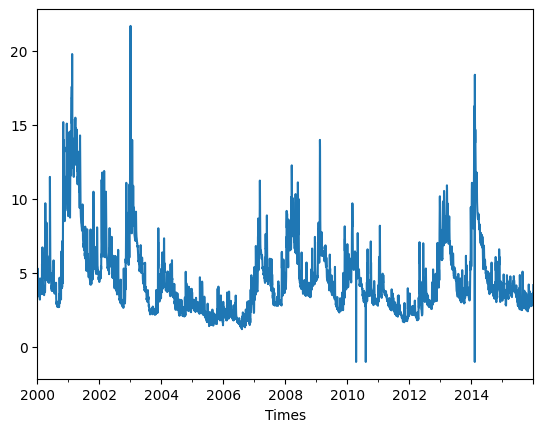

In [9]:
obsplot.plot()

If we wish to modify the plot, this is also possible:

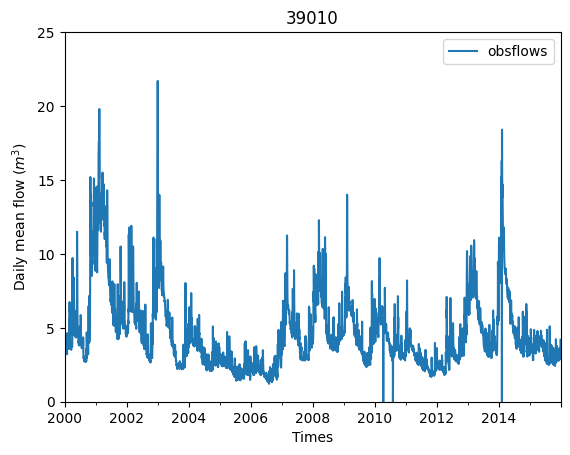

In [10]:
plt.rcParams.update({'font.size': 10}) # make the text in the plot easier to read
ax = plt.gca() # gca = get current axis, allows us to get the most recent axis used...
obsplot.plot(ax=ax, label = 'obsflows') # ... and specify it to the plotting command, which is simply dataframename.plot()
ax.set_ylim([0, 25]) # set the y axis lower and upper bounds
plt.title('39010') # set the title
plt.ylabel('Daily mean flow (' + r'$m^3$' + ')') # set the y axis label
plt.legend() # add a legend

Hmm, some of the data points look a bit weird, suddenly going very low - what's going on there?

It's likely the '-1' values we could see in the table earlier. We can deal with these by telling pandas that this value represents a missing value, so that it ignores them when plotting them and doing any other analysis.

In [11]:
%%capture
obsdata = pd.read_csv('s3://example-data/obsflows.csv',
                      parse_dates={'Times': [0,1,2]}, dayfirst=True,
                      na_values = -1,
                      storage_options={'endpoint_url': "https://fdri-o.s3-ext.jc.rl.ac.uk", 'anon': True})
obsdata.set_index('Times', inplace=True)

In [12]:
obsdata

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.745,10.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.661,9.368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.547,8.632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.349,9.141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.859,8.830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.578,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,3.338,NaN,NaN,NaN,NaN,NaN,6.872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,3.391,NaN,NaN,NaN,NaN,NaN,6.384,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Excellent, now let's try the plotting again:

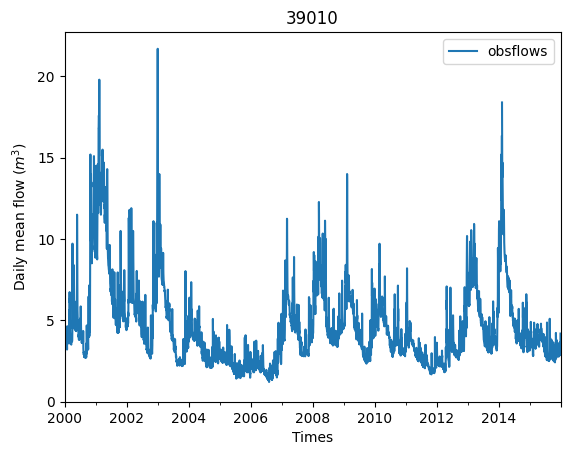

In [13]:
# timeperiod and gauge ID to plot
startplot = '2000-01-01'
endplot   = '2015-12-31'
catchmentplot = '39010'

obsplot = obsdata[startplot:endplot]

plt.rcParams.update({'font.size': 10})
ax = plt.gca()
obsplot[catchmentplot].plot(ax=ax, label = 'obsflows')
ylims = ax.get_ylim()
ax.set_ylim([0, ylims[1]])
plt.title(catchmentplot)
plt.ylabel('Daily mean flow (' + r'$m^3$' + ')')
plt.legend()

Much better! What pandas has done is simply leave a blank space where the data is NaN, which would show up if you zoomed in the plot a bit more.

E.g.:

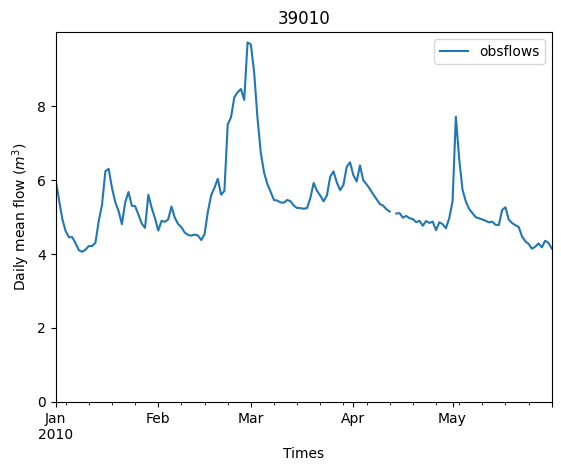

In [14]:
# timeperiod and gauge ID to plot
startplot = '2010-01-01'
endplot   = '2010-05-31'
catchmentplot = '39010'

obsplot = obsdata[startplot:endplot]

plt.rcParams.update({'font.size': 10})
ax = plt.gca()
obsplot[catchmentplot].plot(ax=ax, label = 'obsflows')
ylims = ax.get_ylim()
ax.set_ylim([0, ylims[1]])
plt.title(catchmentplot)
plt.ylabel('Daily mean flow (' + r'$m^3$' + ')')
plt.legend()

Let's have a look at annual averages for a given catchments to see if we can pick out any particularly wet/dry years.

In [15]:
obsdata

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.745,10.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.661,9.368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.547,8.632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.349,9.141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.859,8.830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.578,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,3.338,NaN,NaN,NaN,NaN,NaN,6.872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,3.391,NaN,NaN,NaN,NaN,NaN,6.384,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To check if Pandas has recognised the information in the Times column as date-time information we can check its type. We can access the information in this column directly by using the 'index' accessor, as we set this column as the index earlier:

In [16]:
type(obsdata.index)

pandas.core.indexes.datetimes.DatetimeIndex

'DatetimeIndex' is showing up, which means that Pandas has indeed recognised it as a special category of data - date and time information.

We can therefore pull out some useful information from it, such as the year, month, day, but also less obvious information such as day-of-week, quarter/season, days-in-month...

In [17]:
obsdata.index.year

Index([1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Times', length=20819)

In [18]:
obsdata.index.dayofweek

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
      dtype='int32', name='Times', length=20819)

In [19]:
obsdata.index.quarter

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='Times', length=20819)

We can use this information to group the rows of the table into categories, and then perform some operation on these groups. For example, to find the yearly mean for each catchment:

In [20]:
annavgs = obsdata.groupby(obsdata.index.year).mean()

In [21]:
annavgs

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.580447,17.697025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.588419,22.581422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.261852,17.665107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.778393,13.490404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.105490,20.412386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.703570,24.790945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.790888,20.279611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.671817,20.924063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.853959,15.277918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the default behaviour of arithmetic operations (such as mean, sum etc.) applied to pandas dataframes where there is missing data is to ignore the missing data when doing the calculation. So for example if a given catchment has a handful of observations that are showing as NaNs for a given year, the mean for that catchment-year will be calculated ignoring the NaN values completely. Only catchment-years where *all* the observations are NaN does a NaN get returned in an arithmetic calculation. This behaviour is customisable. Take a look at the [Pandas documentation](https://pandas.pydata.org/) for more information.

Pandas [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) logic is very powerful and useful, especially this ability to parse dates and times. This example is just one of many things that can be done with it. Another example could be to add a column describing a particular catchment property, like steepness or size, group the catchments into bins from smallest to largest or shallowest to steepest, and see how the mean flow varies with these properties.

For now though, let's keep it simple and take a look at a couple of the annual averages we've got.

Text(0.5, 1.0, 'R = 0.3675150066986717')

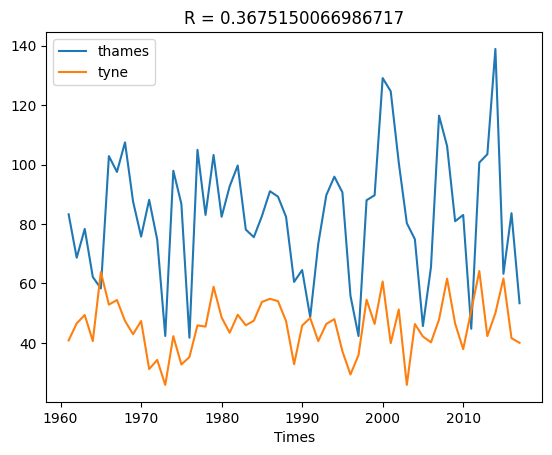

In [22]:
annavgs['39001'].plot(label='thames')
axes = plt.gca()
annavgs['23001'].plot(ax=axes, label='tyne')
plt.legend()

corr = np.corrcoef(annavgs['39001'], annavgs['23001'])[0,1]
plt.title('R = ' + str(corr))

The Tyne is a large river in the northeast of England. There is perhaps not as much correlation between the two rivers as you might think!

Pandas can also group by meteorological season, which are defined based on purely the calendar months:
- Winter: December, January, February (DJF)
- Spring: March, April, May (MAM)
- Summer: June, July, August (JJA)
- Autumn: September, October, November (SON)

We can create seasonal averages by making further use of pandas's date-time handling. Perhaps let's look at the 90th percentile of the winter flows in each year for the same two catchments above.

Note that because 'quarters starting in December' is not a property of the Index (unlike years), we have to use a more sophisticated method to group the rows the way we would like.

Pandas has a [```Grouper```](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function that allows for more complicated groupings. To see what more it allows, you can run ```pd.Grouper?```.

In [23]:
pc90 = obsdata.groupby(pd.Grouper(freq='QS-DEC')).quantile(0.9)

In [24]:
pc90

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1960-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.586,39.8460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.601,25.3480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.674,25.8520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.300,52.9200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.364,74.0320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01,90.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.766,7.1085,...,NaN,NaN,75.574,NaN,NaN,39.477,NaN,22.1088,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.630,4.0280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.109,139.9860,...,2.7865,NaN,NaN,NaN,NaN,53.300,NaN,27.1050,NaN,NaN


To select out only the winter flows, we want every 4th row, which we can represent as ```::4```. This is python indexing shorthand for ```0:-1:4``` which translates as the 0th (first) row to the -1th (last) row with a 'stride' of 4.

You'll see [```loc```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) and [```iloc```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) a lot with Pandas. These are powerful methods used to select out rows and columns from the table.[```loc```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) can be used to select out cells or ranges of cells using the row and column *names* or *labels*, whereas [```iloc```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) is used to select based on the row and column *indices* (e.g. the cell at row 8 and column 5 would be selected with ```obsdata.iloc[8, 5]``` and ```obsdata.loc['1961-01-08', '04003']``` - try it out for yourself!).

In [25]:
pc90_DJF = pc90.iloc[::4, :]

In [26]:
pc90_DJF

,02001,02002,03002,03003,04003,04005,04006,06008,07001,07002,...,90003,91002,93001,94001,95001,96001,96002,96003,96004,97002
Times,,,,,,,,,,,,,,,,,,,,,
1960-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.586,39.8460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.364,74.0320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.993,34.5860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.370,22.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.167,52.3250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.178,67.4350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.022,76.4380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.140,37.3600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.301,38.3300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'R = 0.3474691849334244')

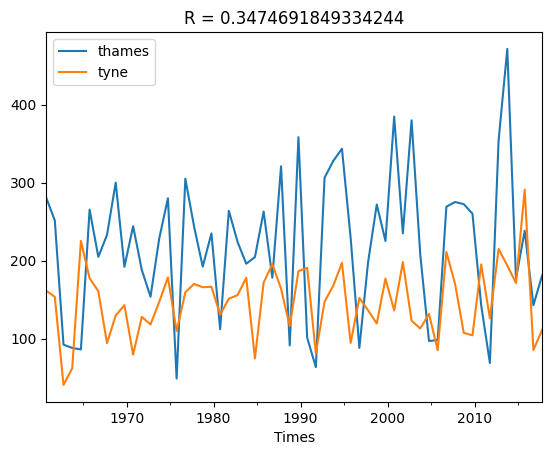

In [27]:
thames = pc90_DJF['39001'].plot(label='thames')
axes = plt.gca()
tyne = pc90_DJF['23001'].plot(ax=axes, label='tyne')
plt.legend()

corr = np.corrcoef(pc90_DJF['39001'], pc90_DJF['23001'])[0,1]
plt.title('R = ' + str(corr))

## [ASCII Grid files (ESRI format)](https://en.wikipedia.org/wiki/Esri_grid)

Another common file you might come across in hydrology is a file with the extension '**.grd**'. These files are often used as inputs/outputs of hydrological models. They are another textual representation of gridded data.

Ultimately these are just numbers laid out in a (usually) tab-separated pattern with some header lines at the top describing metadata needed to interpret the data into a grid. I find the easiest way of working with these is to read them into [Xarray](https://docs.xarray.dev/en/stable/), the now well established go-to library for working with gridded and N-dimensional data in various formats.

Here we'll develop the code to do this, but first let's take a look at what a typical grd file looks like if you open it in a text editor:

**Bonus:** The next code cell also shows how to display an image stored in an object store

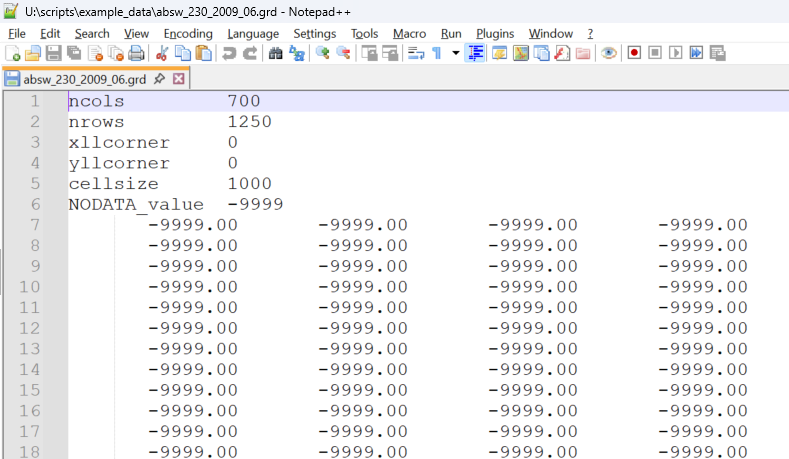

In [28]:
from PIL import Image
fs_img = s3fs.S3FileSystem(anon=True, endpoint_url="https://fdri-o.s3-ext.jc.rl.ac.uk")
display(Image.open(fs_img.open('s3://example-data/grdfile.png')))

Here you can clearly see the 6 header lines, followed by the rows & columns of numeric data.

- The **ncols** and **nrows** information is fairly self-explanatory
- The **xllcorner** and **yllcorner** are telling you what the x and y coordinates are of the 'lower left' corner of the grid. Important to note that these numbers represent the *corner* of the gridcell in the lower left corner of the grid, not it's centre point.
- **cellsize** tells you the x and y extent of the each cell in the grid, i.e. the distance between gridcells
- **NODATA_value** is also fairly self-explanatory

These files are only able to represent regular grids (grids that have consistent spacing between the grid cells) that also have the same spacing in the x and y direction.

The header information contains everything we need to know in order to read this into Xarray.

First we need to read in the original file. Reading in any textual data in python is simple:

In [29]:
s3 = s3fs.S3FileSystem(anon=True, endpoint_url="https://fdri-o.s3-ext.jc.rl.ac.uk")
grdfile = s3.open('s3://example-data/absw_230_2009_06.grd')

In [30]:
grdfile.readline()

b'ncols         700\n'

The [```readline()```](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) function reads the current line as a string, then the next time it is called, does the same for the next line. To grab the entire file contents at once, we can use ```readlines()```:

In [31]:
filecontents = grdfile.readlines()

In [32]:
filecontents

Output hidden; open in https://colab.research.google.com to view.

Each row becomes an item in the list

**Note:** That we seem to missing the top row of the file. This is because we already called ```readline``` which advances the line number the next call to ```readline``` or ```readlines``` will read from. To read from the top of the file, the file needs to be reopened.

When we have finished working with a file using this method it is important to manually close it, otherwise it will remain open in memory and can cause all sorts of fun errors and bugs, especially when loops are involved!

In [33]:
grdfile.close()

We could read in the entire file this way, however for numeric data other libraries, mainly [Numpy](https://numpy.org/), tend to be easier to work with. But now that we know how to read in text, we can pull out the header information which we can then use to construct the grid.

In [34]:
filein = 's3://example-data/absw_230_2009_06.grd'
grdfile = s3.open(filein)
ncols  = int(grdfile.readline().split()[1])
nrows  = int(grdfile.readline().split()[1])
xllc   = float(grdfile.readline().split()[1])
yllc   = float(grdfile.readline().split()[1])
res    = float(grdfile.readline().split()[1])
nodata = float(grdfile.readline().split()[1])
print('ncols: ' + str(ncols))
print('nrows: ' + str(nrows))
print('xllc: ' + str(xllc))
print('yllc: ' + str(yllc))
print('res: ' + str(res))
print('nodata: ' + str(nodata))
grdfile.close()

ncols: 700
nrows: 1250
xllc: 0.0
yllc: 0.0
res: 1000.0
nodata: -9999.0


Next we can use [Numpy's ```loadtxt```](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) function to read in the actual numeric data, skipping the header files:

In [35]:
grdfile = s3.open(filein)
data = np.loadtxt(grdfile,skiprows=6)
grdfile.close()

In [36]:
data

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

Numpy has cleverly determined the data it is reading in is a grid, and stored it as such in an array

Now all we need to do is generate the coordinates from the information we read in from the header:

The [Numpy ```linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) command generates a sequence of equally spaced numbers: ```np.linspace(start, end, number of elements in sequence)```

We can work out all of these from the header information. Remember that the xllc and yllc are the coordinates of the *corner* of the lower left gridcell, and generally gridcell coordinates are for the *centre* of each gridcell.

In [37]:
xcoords = np.linspace(xllc + (res/2), xllc + (res/2) + (res*(ncols-1)), ncols)
ycoords = np.linspace(yllc + (res/2), yllc + (res/2) + (res*(nrows-1)), nrows)

In [38]:
xcoords

array([5.000e+02, 1.500e+03, 2.500e+03, 3.500e+03, 4.500e+03, 5.500e+03,
       6.500e+03, 7.500e+03, 8.500e+03, 9.500e+03, 1.050e+04, 1.150e+04,
       1.250e+04, 1.350e+04, 1.450e+04, 1.550e+04, 1.650e+04, 1.750e+04,
       1.850e+04, 1.950e+04, 2.050e+04, 2.150e+04, 2.250e+04, 2.350e+04,
       2.450e+04, 2.550e+04, 2.650e+04, 2.750e+04, 2.850e+04, 2.950e+04,
       3.050e+04, 3.150e+04, 3.250e+04, 3.350e+04, 3.450e+04, 3.550e+04,
       3.650e+04, 3.750e+04, 3.850e+04, 3.950e+04, 4.050e+04, 4.150e+04,
       4.250e+04, 4.350e+04, 4.450e+04, 4.550e+04, 4.650e+04, 4.750e+04,
       4.850e+04, 4.950e+04, 5.050e+04, 5.150e+04, 5.250e+04, 5.350e+04,
       5.450e+04, 5.550e+04, 5.650e+04, 5.750e+04, 5.850e+04, 5.950e+04,
       6.050e+04, 6.150e+04, 6.250e+04, 6.350e+04, 6.450e+04, 6.550e+04,
       6.650e+04, 6.750e+04, 6.850e+04, 6.950e+04, 7.050e+04, 7.150e+04,
       7.250e+04, 7.350e+04, 7.450e+04, 7.550e+04, 7.650e+04, 7.750e+04,
       7.850e+04, 7.950e+04, 8.050e+04, 8.150e+04, 

In [39]:
ycoords

array([5.0000e+02, 1.5000e+03, 2.5000e+03, ..., 1.2475e+06, 1.2485e+06,
       1.2495e+06])

Now we are ready for Xarray to take charge. Xarray requires 3 key pieces of information:
- The data values themselves
- The names of the dimensions/coordinates (in this case they can just be 'x' and 'y')
- The coordinates of each of the dimensions (in this case the x and y coordinates we've just generated)

In [40]:
ydimname = 'y'
xdimname = 'x'
grdxr = xr.DataArray(data, coords=[(ydimname, ycoords), (xdimname, xcoords)])
grdxr = grdxr.where(grdxr != nodata)

In [41]:
grdxr

<xarray.DataArray (y: 1250, x: 700)> Size: 7MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 10kB 500.0 1.5e+03 2.5e+03 ... 1.248e+06 1.25e+06
  * x        (x) float64 6kB 500.0 1.5e+03 2.5e+03 ... 6.985e+05 6.995e+05

An Xarray DataArray is a coordinate-aware representation of our data, much like a version of Pandas designed for gridded and N-dimensional data, allowing operations and analyses to be carried out based on the *coordinate values*. We will learn more about Xarray soon!

For now, let's plot the data and see what it looks like:

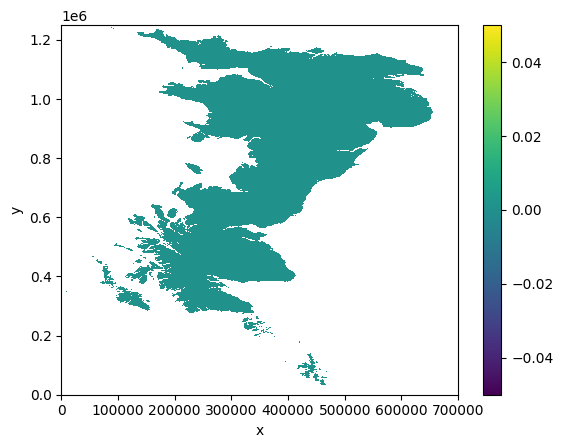

In [42]:
grdxr.plot()

Oh dear, that appears to be upside down! How might we fix this?

In [43]:
xcoords = np.linspace(xllc + (res/2), xllc + (res/2) + (res*(ncols-1)), ncols)
ycoords = np.linspace(yllc + (res/2), yllc + (res/2) +  (res*(nrows-1)), nrows)[::-1]

ydimname = 'y'
xdimname = 'x'
grdxr = xr.DataArray(data, coords=[(ydimname, ycoords), (xdimname, xcoords)])
grdxr = grdxr.where(grdxr != nodata)

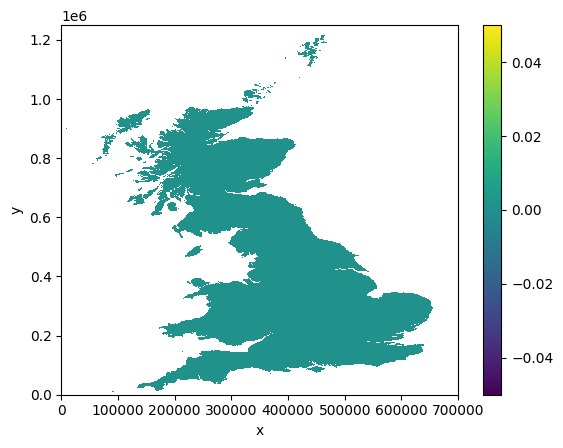

In [44]:
grdxr.plot()

Now we have a basic Xarray representation of the data, which comes with various powerful analysis tools, some of which we will explore in the next notebook, with data that is a little more interesting than all zeroes!

## Further Resources

The interested reader might want to check out [Polars](https://pola.rs/), which is a more efficient rewrite of pandas for improved speed in handling large tabular datasets and databases. The commands are largely the same as Pandas.

- [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html)
- [Numpy loadtxt documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)
- [Pandas groupby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- [Pandas Grouper documentation](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)
- [National River Flow Archive (NRFA) catchment information](https://nrfa.ceh.ac.uk/data/about-data/catchment-information)